#**Deteksi Dini Kanker Payudara Melalui Pemeriksaan Mammografi**

#**Pendahuluan**


Kanker payudara merupakan salah satu jenis penyakit kanker yang paling sering terjadi dan menjadi penyebab kematian utama pada wanita di berbagai belahan dunia. Penyakit ini muncul akibat pertumbuhan sel abnormal pada jaringan payudara yang tidak terkendali. Jika tidak didiagnosis dan ditangani sejak awal, sel-sel tersebut dapat menyebar ke organ lain. Oleh karena itu, proses deteksi dini menjadi sangat krusial untuk meningkatkan kemungkinan keberhasilan pengobatan serta menurunkan risiko kematian akibat penyakit ini.

Salah satu metode yang banyak digunakan dalam pemeriksaan awal kanker payudara adalah mammografi, yaitu teknik pencitraan dengan sinar-X yang dapat mendeteksi adanya kelainan di jaringan payudara. Dari hasil pencitraan ini, sering kali ditemukan massa atau benjolan yang mencurigakan. Istilah mammographic mass merujuk pada benjolan yang tampak pada citra mammografi. Massa tersebut dapat bersifat tidak berbahaya (jinak) atau bersifat ganas (kanker), sehingga perlu dilakukan analisis lebih lanjut untuk menentukan sifat dan potensi bahayanya.

Untuk membantu proses evaluasi, para ahli biasanya menilai beberapa ciri dari massa tersebut, seperti bentuk (shape), batas tepi (margin), dan kepadatan (density). Penilaian terhadap karakteristik ini sangat berguna dalam memperkirakan kemungkinan keganasan suatu massa. Informasi ini juga menjadi dasar dalam pengambilan keputusan medis selanjutnya, apakah pasien perlu menjalani pemeriksaan lanjutan seperti biopsi atau cukup dengan pemantauan rutin.

##**Data Set**

Data diambil dari https://archive.ics.uci.edu/dataset/14/breast+cancer.

Yaitu data Kanker Payudara dengan jumlah data sebanyak 286 data dan 9 fitur.

##**Tujuan**

 Dataset ini digunakan untuk menyediakan data yang dapat digunakan dalam pengembangan model klasifikasi guna membedakan antara massa jinak dan massa ganas pada citra mammografi, sehingga dapat membantu dalam deteksi dini kanker payudara dan mengurangi prosedur biopsi yang tidak perlu.











In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data, anggap missing value ditandai dengan '?'
df = pd.read_csv("breast-cancer.csv", sep=';', na_values='?')
df.columns = df.columns.str.strip()  # <-- ini penting

##**Data Understanding**

### a. Penjelsan Fitur

- Class = Kelas target yang menunjukkan apakah kejadian kanker berulang atau tidak setelah pengobatan awal.
- Age = Rentang usia pasien dalam tahun.
- Menopause = Status menopause pasien.
- Tumor-Size =  Ukuran tumor dalam mm.
- Inv-Nodes = Jumlah kelenjar getah bening yang terlibat.
- Node-caps = Apakah kapsul node terlibat atau tidak.
- deg-malig = Derajat keganasan tumor (1 = rendah, 2 = sedang, 3 = tinggi).
- Breast = Sisi payudara yang terkena (kiri atau kanan).
- Breast-quad =  Lokasi kuadran payudara yang terkena.
- Irradiat = Apakah pasien mendapat radiasi atau tidak.

### b. Ekplorasi Data

In [2]:
# Cek tipe data dan jumlah missing
print("\nInformasi tipe data dan missing values:")
print(df.info())

# Jumlah missing values per kolom
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Distribusi target class
print("\nDistribusi kelas target:")
print(df['class'].value_counts())

# Nilai unik di setiap kolom (cek outlier kategori)
print("\nNilai unik tiap kolom:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Informasi tipe data dan missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None

Jumlah missing values per kolom:
class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

Distribusi kelas target:
class
no-recurrence-events    201
recurrence-events        85
N

- Berdasarkan hasil eksplorasi awal terhadap dataset kanker payudara yang terdiri dari 286 entri dan 10 atribut, diketahui bahwa sebagian besar kolom bertipe data kategorikal (object), sementara hanya satu kolom yaitu deg-malig yang bertipe numerik (integer). Namun, ditemukan bahwa beberapa nama kolom memiliki spasi di awal seperti ' age' dan ' menopause', yang dapat mengganggu proses analisis dan perlu dibersihkan terlebih dahulu dengan menghapus spasi menggunakan fungsi str.strip().

- Dari segi kualitas data, terdapat nilai hilang (missing values) pada dua atribut, yaitu node-caps sebanyak 8 nilai dan breast-quad sebanyak 1 nilai. Hal ini menunjukkan bahwa sebagian kecil data tidak memiliki informasi lengkap, dan dapat ditangani dengan menghapus baris tersebut atau mengisinya dengan kategori khusus seperti 'unknown'. Distribusi kelas target menunjukkan ketidakseimbangan yang moderat, di mana terdapat 201 data dengan label no-recurrence-events (sekitar 70%) dan 85 data dengan label recurrence-events (sekitar 30%). Meskipun tidak terlalu ekstrem, ketidakseimbangan ini tetap perlu diperhatikan apabila data akan digunakan untuk pelatihan model klasifikasi.

- Selain itu, ditemukan adanya kesalahan dalam format data pada beberapa kolom kategorikal seperti tumor-size dan inv-nodes. Kesalahan ini kemungkinan disebabkan oleh konversi otomatis saat file diolah dalam spreadsheet seperti Microsoft Excel, di mana rentang angka seperti '05-09' berubah menjadi format tanggal '05-Sep', dan '10-14' menjadi 'Okt-14'. Hal ini harus diperbaiki agar representasi data menjadi konsisten dan sesuai dengan nilai yang seharusnya.-

### c. Visualisasi Data

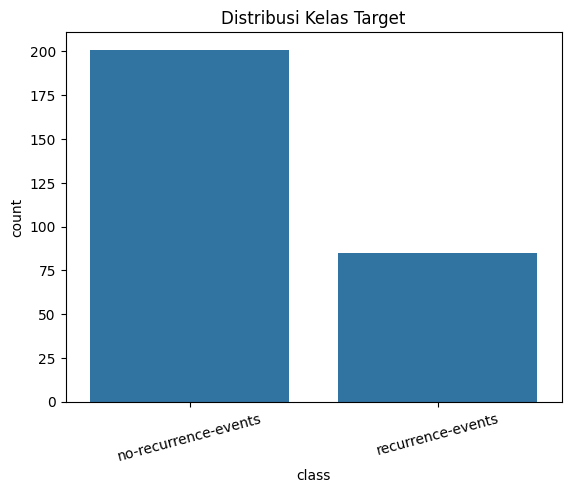

In [3]:
# Distribusi Kelas Target
sns.countplot(x='class', data=df)
plt.title("Distribusi Kelas Target")
plt.xticks(rotation=15)
plt.show()

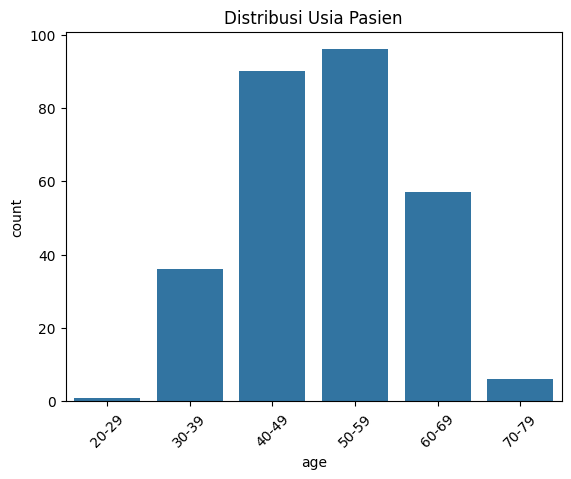

In [4]:
#Distribusi Usia Pasien
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.title("Distribusi Usia Pasien")
plt.xticks(rotation=45)
plt.show()

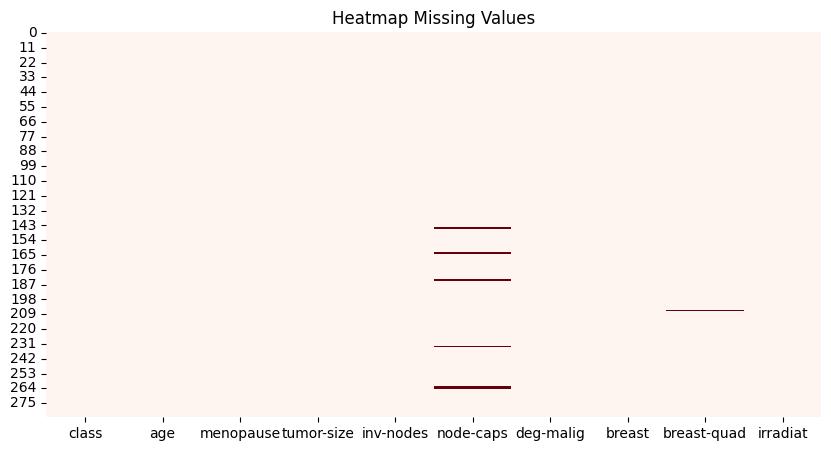

In [5]:
#Visualisasi Missing Values (Heatmap)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Heatmap Missing Values")
plt.show()

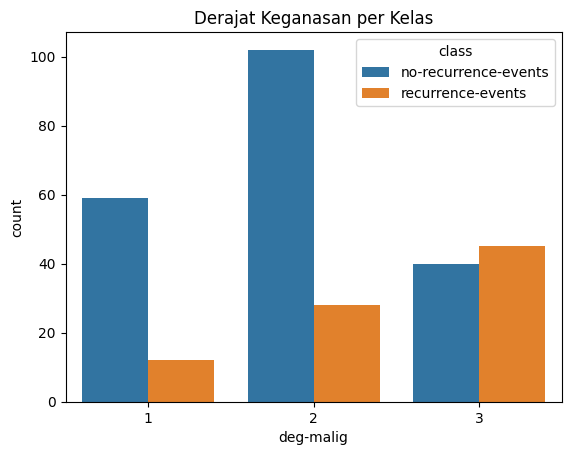

In [6]:
#Derajat Malignancy per Kelas
sns.countplot(x='deg-malig', hue='class', data=df)
plt.title("Derajat Keganasan per Kelas")
plt.show()

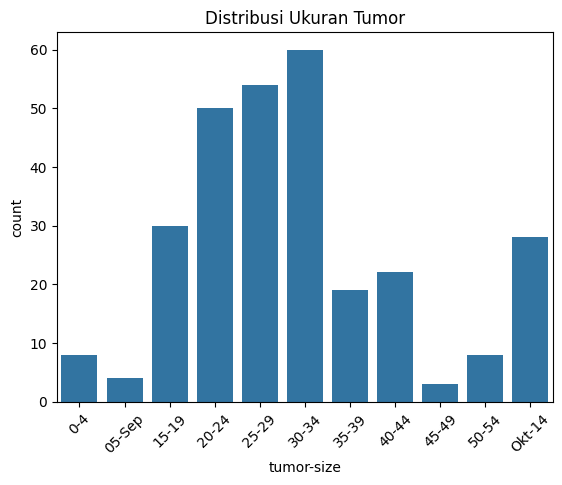

In [7]:
#Distribusi Tumor Size
sns.countplot(x='tumor-size', data=df, order=sorted(df['tumor-size'].unique()))
plt.title("Distribusi Ukuran Tumor")
plt.xticks(rotation=45)
plt.show()

##**Prepocessing data**

In [8]:
# Bersihkan Nama Kolom
df = pd.read_csv("breast-cancer.csv", sep=';', na_values='?')
df.columns = df.columns.str.strip()  # Menghapus spasi di awal/akhir nama kolom

In [9]:
# Memperbaiki Nilai Kategori yang Salah Format
df['tumor-size'].replace({'Okt-14': '10-14', '05-Sep': '5-9'}, inplace=True)
df['inv-nodes'].replace({
    '06-Agu': '6-8',
    '09-Nov': '9-11',
    '03-Mei': '3-5',
    'Des-14': '12-14'
}, inplace=True)


C:\Users\raiha\AppData\Local\Temp\ipykernel_3352\3410679630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tumor-size'].replace({'Okt-14': '10-14', '05-Sep': '5-9'}, inplace=True)
C:\Users\raiha\AppData\Local\Temp\ipykernel_3352\3410679630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [10]:
# Menangani Missing Value
df['node-caps'].fillna('unknown', inplace=True)
df['breast-quad'].fillna('unknown', inplace=True)

C:\Users\raiha\AppData\Local\Temp\ipykernel_3352\2536257775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['node-caps'].fillna('unknown', inplace=True)
C:\Users\raiha\AppData\Local\Temp\ipykernel_3352\2536257775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [11]:
# Encoding Data Kategorikal
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
label_cols = df.columns[df.dtypes == 'object']
encoders = {}

# Encoding setiap kolom kategorikal
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Menyimpan encoder jika ingin decode kembali

In [12]:
# Cek Hasil Akhir Preprocessing

print(df.head())

   class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    1          2           5          0          0          3       0   
1      0    2          2           3          0          0          2       1   
2      0    2          2           3          0          0          2       0   
3      0    4          0           2          0          0          2       1   
4      0    2          2           0          0          0          2       1   

   breast-quad  irradiat  
0            1         0  
1            4         0  
2            1         0  
3            2         0  
4            3         0  


##**Klasifikasi (Decission Tree)**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pisahkan fitur (X) dan target (y)
X = df.drop('class', axis=1)
y = df['class']

# 2. Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Prediksi dan evaluasi
y_pred = model.predict(X_test)

##**Evaluasi Model**

Akurasi Model: 0.65


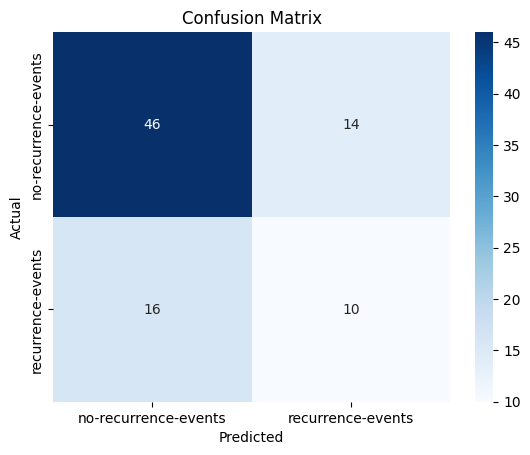

                      precision    recall  f1-score   support

no-recurrence-events       0.74      0.77      0.75        60
   recurrence-events       0.42      0.38      0.40        26

            accuracy                           0.65        86
           macro avg       0.58      0.58      0.58        86
        weighted avg       0.64      0.65      0.65        86



In [14]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoders['class'].classes_,
            yticklabels=encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=encoders['class'].classes_))